<a href="https://colab.research.google.com/github/ssunwalka01/peopleinteractive/blob/master/Shubham_using_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Classification Problem (Targeting to whether the customers bought a specific product or not).

- Loading the Libraries

In [48]:
!pip install pycaret

In [49]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [50]:
# importing libraries
import pandas as pd # for data handling
import numpy as np # for mathematical calculations
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

In [51]:
# training data
data = pd.read_table('/content/Dataset.txt', sep = '\t')
data.to_csv("data_train.csv", index = False)
# test data
test = pd.read_table('/content/Dataset_test.txt', sep = '\t')
test.to_csv("data_test.csv", index = False)

In [52]:
train = pd.read_csv("/content/data_train.csv")
data_test = pd.read_csv("/content/data_test.csv")

In [53]:
data = train.sample(frac=0.80, random_state=786).reset_index(drop=True)
data_unseen = train.drop(data.index).reset_index(drop=True)

test_new = train.drop(data.index).reset_index(drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (80944, 24)
Unseen Data For Predictions: (20236, 24)


In [54]:
from pycaret.classification import *

In [55]:
exp_clf101 = setup(data = data, target = 'C', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(80944, 24)"
4,Missing Values,False
5,Numeric Features,19
6,Categorical Features,2
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [56]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.7592,0.7178,0.0341,0.6455,0.0647,0.0411,0.1064,1.2274
1,CatBoost Classifier,0.7587,0.7193,0.0653,0.5568,0.1169,0.0692,0.1248,27.7114
2,Gradient Boosting Classifier,0.7558,0.7124,0.0041,0.6148,0.0082,0.0048,0.0340,35.5304
3,Extreme Gradient Boosting,0.7558,0.7119,0.0038,0.6622,0.0075,0.0047,0.0354,8.4179
4,Naive Bayes,0.7554,0.5130,0.0000,0.0000,0.0000,0.0000,0.0000,0.0813
5,Ridge Classifier,0.7554,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1241
6,Linear Discriminant Analysis,0.7554,0.6872,0.0000,0.0000,0.0000,0.0000,0.0000,0.7562
7,Ada Boost Classifier,0.7550,0.6901,0.0030,0.3830,0.0059,0.0021,0.0137,7.8021
8,Extra Trees Classifier,0.7539,0.6842,0.0063,0.3333,0.0124,0.0032,0.0138,9.2662
9,Quadratic Discriminant Analysis,0.7532,0.4998,0.0038,0.1527,0.0073,-0.0006,-0.0051,0.3649


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [57]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7600,0.7246,0.0334,0.6852,0.0637,0.0419,0.1126
1,0.7584,0.7184,0.0334,0.6066,0.0633,0.0388,0.0984
2,0.7613,0.7253,0.0388,0.7167,0.0736,0.0498,0.1273
3,0.7589,0.7092,0.0379,0.6176,0.0714,0.0444,0.1071
4,0.7562,0.7131,0.0252,0.5385,0.0482,0.0269,0.0736
5,0.7584,0.7257,0.0361,0.6061,0.0681,0.0417,0.1022
6,0.7578,0.7138,0.0343,0.5846,0.0647,0.0387,0.0954
7,0.7589,0.7079,0.0334,0.6379,0.0634,0.0401,0.1042
8,0.7615,0.7226,0.0388,0.7288,0.0737,0.0502,0.1294
9,0.7602,0.7173,0.0298,0.7333,0.0572,0.0389,0.1139


In [58]:
#trained model object is stored in the variable 'lightgbm'. 
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Tune Model

In [59]:
tuned_lgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7609,0.7299,0.0659,0.5984,0.1187,0.0738,0.1370
1,0.7562,0.7214,0.0514,0.5135,0.0935,0.0513,0.0992
2,0.7637,0.7342,0.0794,0.6331,0.1411,0.0916,0.1609
3,0.7567,0.7048,0.0631,0.5224,0.1126,0.0632,0.1128
4,0.7580,0.7055,0.0541,0.5556,0.0986,0.0577,0.1130
5,0.7584,0.7174,0.0595,0.5593,0.1076,0.0635,0.1197
6,0.7571,0.7017,0.0541,0.5357,0.0983,0.0559,0.1078
7,0.7571,0.7151,0.0577,0.5333,0.1041,0.0592,0.1107
8,0.7597,0.7161,0.0623,0.5798,0.1125,0.0683,0.1281
9,0.7513,0.7041,0.0307,0.3908,0.0569,0.0221,0.0476


In [60]:
print(tuned_lgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.5, max_depth=80,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=30, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.5, reg_lambda=0.7, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


Plotting Area under curve

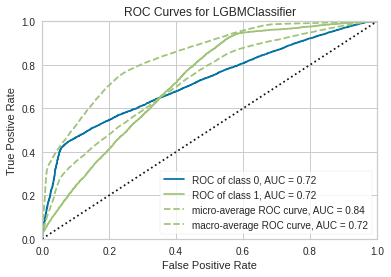

In [61]:
plot_model(tuned_lgbm, plot = 'auc')

precision Recall curve

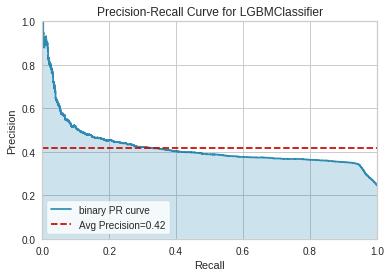

In [62]:
plot_model(tuned_lgbm, plot = 'pr')

Feature importance

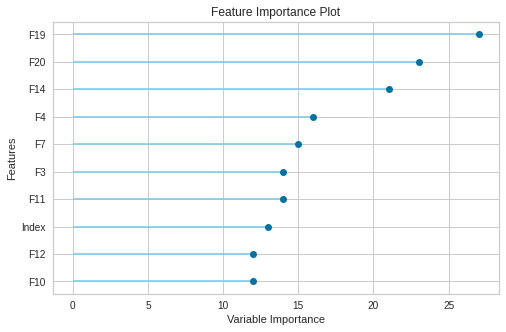

In [63]:
plot_model(tuned_lgbm, plot='feature')

Confusion matrix plotting

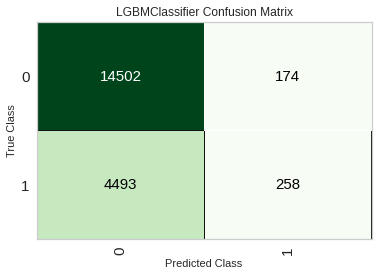

In [64]:
plot_model(tuned_lgbm, plot = 'confusion_matrix')

In [65]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Prediction

In [66]:
predict_model(tuned_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7598,0.7218,0.0543,0.5972,0.0996,0.0613,0.1237


In [67]:
final_lgbm = finalize_model(tuned_lgbm)

In [68]:
predict_model(final_lgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7685,0.7577,0.0772,0.763,0.1403,0.0998,0.1922


Prediction on new data

In [69]:
unseen_predictions = predict_model(final_lgbm, data=data_unseen)
unseen_predictions.head()

,Index,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,C,Label,Score
0,80945,0.071419,0.606026,0.569767,0.962710,9500,3167,-5710,7461,-4252,6375304095,-5472164412,-3517846529,5596844388,-8338910838,4/15/1984,1/25/1990,6,1,901,501,1,1,0,0,0.0530
1,80946,0.950711,0.117410,0.579425,0.069873,-8139,5393,9611,-2854,8757,-3288526720,4122397944,-4242010741,1462703195,9822094227,2/1/1982,4/8/1988,1,1,129,233,6,1,1,0,0.3916
2,80947,0.900093,0.724612,0.636933,0.770100,5240,-2212,-961,6986,7577,-4867985005,2936076879,-4388652313,-3275627584,2822315645,10/5/1987,2/4/1987,1,1,478,391,3,5,1,0,0.3235
3,80948,0.365787,0.723809,0.721524,0.935274,-198,1011,-9736,9124,-6180,-5696232376,5766208783,-157634875,-300193142,3116821256,5/9/1980,11/12/1985,1,1,420,167,1,11,0,0,0.2908
4,80949,0.025485,0.959913,0.778689,0.459118,-9801,-7404,-9710,9964,3514,3184660015,-2607221134,6149207491,154245165,-3603763495,12/19/1992,5/6/1991,1,1,557,386,1,1,0,0,0.3909


finish